<a href="https://colab.research.google.com/github/amrit-lal-singh/ML-Dl/blob/main/Image_restoration_dehazer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimating Airlight: 0%
Estimating Airlight: 0%
Estimating Airlight: 0%
Estimating Airlight: 0%
Estimating Airlight: 0%
Estimating Airlight: 0%
Estimating Airlight: 0%
Estimating Airlight: 0%
Estimating Airlight: 1%
Estimating Airlight: 1%
Estimating Airlight: 1%
Estimating Airlight: 1%
Estimating Airlight: 1%
Estimating Airlight: 1%
Estimating Airlight: 1%
Estimating Airlight: 1%
Estimating Airlight: 1%
Estimating Airlight: 2%
Estimating Airlight: 2%
Estimating Airlight: 2%
Estimating Airlight: 2%
Estimating Airlight: 2%
Estimating Airlight: 2%
Estimating Airlight: 2%
Estimating Airlight: 2%
Estimating Airlight: 3%
Estimating Airlight: 3%
Estimating Airlight: 3%
Estimating Airlight: 3%
Estimating Airlight: 3%
Estimating Airlight: 3%
Estimating Airlight: 3%
Estimating Airlight: 3%
Estimating Airlight: 3%
Estimating Airlight: 4%
Estimating Airlight: 4%
Estimating Airlight: 4%
Estimating Airlight: 4%
Estimating Airlight: 4%
Estimating Airlight: 4%
Estimating Airlight: 4%
Estimating Airli

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in true_divide


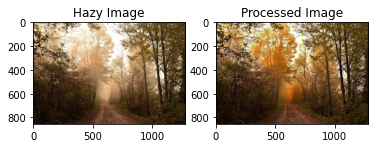

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
from cv2.ximgproc import guidedFilter
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage.io import imread, imsave

def KNB(mw,K):
    mwg = rgb2gray(mw)
    r = np.size(mwg)
    
    re,co = np.shape(mwg)
    nbh = np.zeros([re,co,3])
    #nbh_t = zeros([r,3])
    nbh_v = np.zeros([K,3])
    cent = mwg[int(np.floor(re/2)), int(np.floor(co/2))]
    dist = np.zeros(r)
    dist = abs(mwg - cent)
    dist_ord = np.sort(np.ravel(dist[:]))
    dist_K = dist_ord[K-1]
    x,y = np.where(dist <= dist_K)
    nbh[x,y,0] = mw[x,y,0]
    nbh[x,y,1] = mw[x,y,1]
    nbh[x,y,2] = mw[x,y,2]
    nbh_t0 = sorted(np.ravel(nbh[:,:,0]),reverse=True)
    nbh_t1 = sorted(np.ravel(nbh[:,:,1]),reverse=True)
    nbh_t2 = sorted(np.ravel(nbh[:,:,2]),reverse=True)
    nbh_v[:,0] = nbh_t0[0:K]
    nbh_v[:,1] = nbh_t1[0:K]
    nbh_v[:,2] = nbh_t2[0:K]
    return nbh_v

def rgb2gray(img):
    img_gray = np.double( (0.2989*img[:,:,0] + 0.5870*img[:,:,0] + 0.1140*img[:,:,0])) # RGB to Gray Conversion
    return img_gray
        
S = 21 



imgName = 'forest'
f_c = np.double( imread(imgName +".jpg") ) 

Nr,Nc,Np = f_c.shape 


A1 = np.concatenate((np.flipud(np.fliplr(f_c)), np.flipud(f_c), np.flipud(np.fliplr(f_c))), axis=1)
A2 = np.concatenate((np.fliplr(f_c),            f_c,            np.fliplr(f_c)), axis=1)
A3 = np.concatenate((np.flipud(np.fliplr(f_c)), np.flipud(f_c), np.flipud(np.fliplr(f_c))), axis=1)
f_proc = np.concatenate( (A1,A2,A3) ,axis=0)
f_proc = f_proc[Nr-int((S-1)/2):2*Nr+int((S-1)/2), Nc-int((S-1)/2):2*Nc+int((S-1)/2),:]

A_test = np.zeros([Nr,Nc])
f_mv = np.zeros([S,S])
K = np.floor(2*S*S/3)
for k in range(Nr):
    leyend = 'Estimating Airlight: ' + str(int(100*(k+1)/Nr)) + '%'
    print(leyend)
    for l in range(Nc):
        f_mv = ( f_proc[ k:S+k, l:S+l ] )
        f_max = f_mv.max()
        f_min = f_mv.min()
        #u = np.mean(f_mv[:])
        u = (f_min + f_max) / 2.0
        #v = (1 + np.var(f_mv[:]))
        v = f_max - f_min
        A_test[k,l] = u / (1 + v)
print('Done!')

x0,y0 = np.where( A_test == A_test.max())
A = np.zeros(3)
A[0] = f_c[x0[0], y0[0],0]
A[1] = f_c[x0[0], y0[0],1]
A[2] = f_c[x0[0], y0[0],2]
A_est = 0.2989*A[0] + 0.5870*A[1] + 0.1140*A[2]

t_est = np.zeros([Nr,Nc])
trans = np.zeros([Nr,Nc])

PAR = [9, 0.01, 10.0, 4.0]

S = PAR[0]      
w = PAR[1]      
j0 = PAR[2]     
Kdiv = PAR[3]   

y = np.zeros([Nr,Nc,Np])
K = S**2 - int((S**2)/Kdiv)
 
for k in range(Nr):
    leyend = 'Estimating Transmission: ' + str(int(100*(k+1)/Nr)) + '%'
    print(leyend)
    for l in range(Nc):
        f_w = f_proc[ k:S+k, l:S+l, : ]
        f_v = KNB(f_w, K)
        Fmax = f_v.max()
        Fmin = f_v.min()
        range_fv = Fmax - Fmin
        fv_avg = (Fmin+Fmax)/2.0
        if range_fv < w:
            range_fv = w 
        alpha = range_fv/(j0*A_est)
        t_est[k,l] = (A_est - (alpha*fv_avg + (1-alpha)*Fmin)) / (A_est-alpha*fv_avg)
                
        if t_est[k,l] > 1:
            t_est[k,l] = 1
        if t_est[k,l] < w:
            t_est[k,l] = w
print('Done!')

#trans = denoise_tv_chambolle(t_est, weight=1000.0, multichannel=False)
trans = guidedFilter(np.uint8(f_c),np.uint8(255*t_est),30,0.1) / 255.0

y[:,:,0] = (f_c[:,:,0] - A[0]) / trans + A[0]
y[:,:,1] = (f_c[:,:,1] - A[1]) / trans + A[1] 
y[:,:,2] = (f_c[:,:,2] - A[2]) / trans + A[2]
y[:,:,:] = abs(y[:,:,:])
xs,ys,zs = np.where( y > 255 )
y[xs,ys,zs] = 255.0
                    
plt.subplot(121), plt.imshow(f_c/255.), plt.title('Hazy Image')
plt.subplot(122), plt.imshow(y/255.), plt.title('Processed Image')

imsave('%s_output.png' % (imgName), np.uint8(y))